In [ ]:
# default_exp datasets
import numpy as np
import matplotlib.pyplot as plt
import torch
import FRED
if torch.__version__[:4] == '1.13': # If using pytorch with MPS, use Apple silicon GPU acceleration
    device = torch.device("cuda" if torch.cuda.is_available() else 'mps' if torch.has_mps else "cpu")
else:
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device", device)
%load_ext autoreload
%autoreload 2

Using device cpu
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 01a02e Flow Critical Datasets
> Toy datasets for which flow is needed to differentiate ambiguous geometry

# Double Helix

In [ ]:
# export
import numpy as np
def double_helix(num_nodes = 1000, noise=0, num_spirals = 2):
    num_nodes = num_nodes // 2
    X1_z = np.sort(np.random.rand(num_nodes)*2*np.pi*num_spirals)
    X1_x = np.sin(X1_z)
    X1_y = np.cos(X1_z)
    X1 = np.column_stack([X1_x, X1_y, X1_z])
    X1 += np.random.randn(num_nodes,3)*noise
    flows_1 = np.column_stack([np.cos(X1_z),-np.sin(X1_z),np.ones(num_nodes)])
    labels_1 = np.zeros(num_nodes)
    # And form second helix
    offset = np.pi
    X2_z = np.sort(np.random.rand(num_nodes)*2*np.pi*num_spirals)
    X2_x = np.sin(X2_z + offset)
    X2_y = np.cos(X2_z + offset)
    X2 = np.column_stack([X2_x, X2_y, X2_z])
    X2 += np.random.randn(num_nodes,3)*noise
    flows_2 = np.column_stack([-np.cos(X2_z + offset),np.sin(X2_z + offset),-np.ones(num_nodes)])
    labels_2 = np.ones(num_nodes)
    # combine them
    X = np.vstack([X1, X2])
    flows = np.vstack([flows_1,flows_2])
    labels = np.concatenate([labels_1, labels_2],axis=0)
    return X, flows, labels

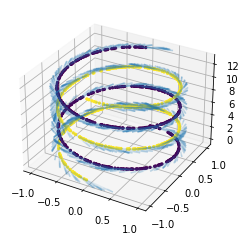

In [ ]:
from FRED.datasets import plot_directed_3d
X, flows, labels = double_helix()
plot_directed_3d(X, flows, labels)

Note that the flows on each strand go opposite directions. When there's a sufficient amount of noise, the dataset looks like a big cylinder. Only the flows can unweave the strands.

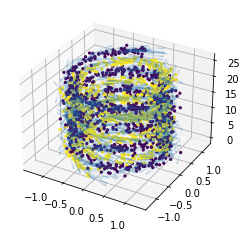

In [ ]:
X, flows, labels = double_helix(noise=0.1, num_spirals=4)
plot_directed_3d(X, flows, labels)